In [52]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt
import scipy
import sys

[   8   16   32   64  128  256 1024]


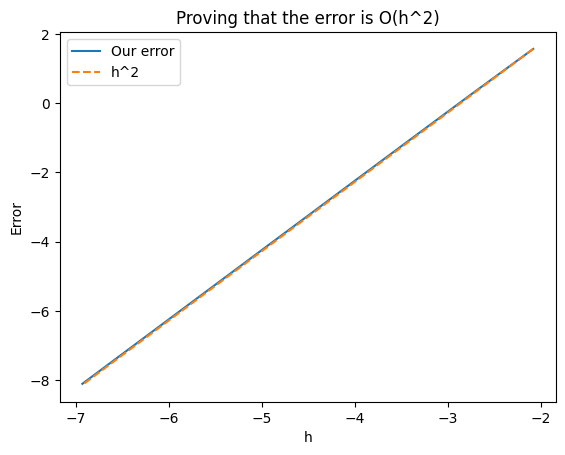

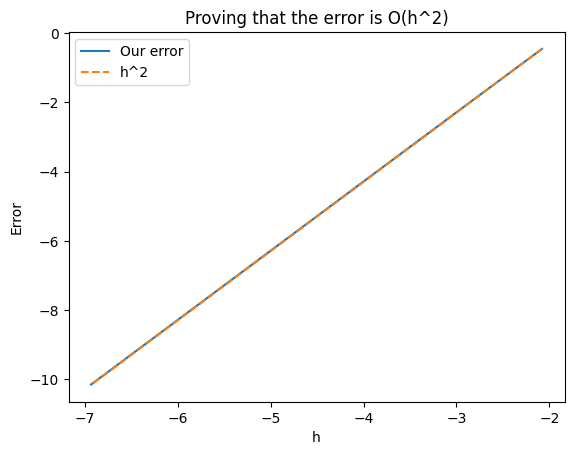

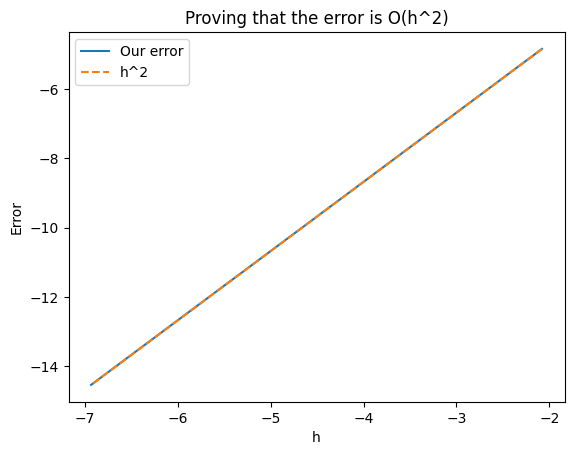

In [5]:
Nvec = np.linspace(3,10,7).astype(int)
Nvec = 2**Nvec
print(Nvec)
errorvec=[[],[],[]]
hvec = []
for N in Nvec:
    T = np.eye(N)*(-2) 
    for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
        T[i+1,i] = 1
        T[i, i+1] = 1
    T[N-1,N-2] = 2
    hvec.append(1/N)
    T = T/(hvec[-1]**2)
    eig = np.array(scipy.linalg.eigvals(T))
    
    eig = eig[eig <= 0]
    eig = np.sort(eig)
    caleig = eig[-3:]
    trueeig = [-(math.pi*5/2)**2, -(math.pi*3/2)**2,-(math.pi*1/2)**2 ]
    errorvec[0].append(np.abs(caleig[0]-trueeig[0]))
    errorvec[1].append(np.abs(caleig[1]-trueeig[1]))
    errorvec[2].append(np.abs(caleig[2]-trueeig[2]))


for i in range(3):
    plt.figure()
    plt.plot(np.log(hvec), np.log(errorvec[i]))
    plt.plot(np.log(hvec), 2*np.log(hvec) + np.log(errorvec[i][0])-2*np.log(hvec[0]), '--')
    plt.xlabel('h')
    plt.ylabel('Error')
    plt.legend(['Our error', 'h^2'])
    plt.title('Proving that the error is O(h^2)')
    plt.show()



This belongs to value(-2.4673990629209333+0j)


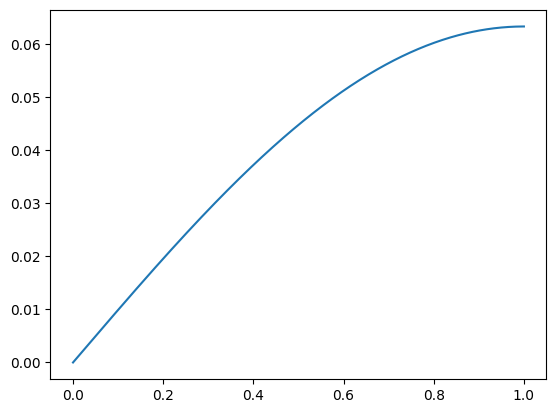

This belongs to value(-22.206444865777218+0j)


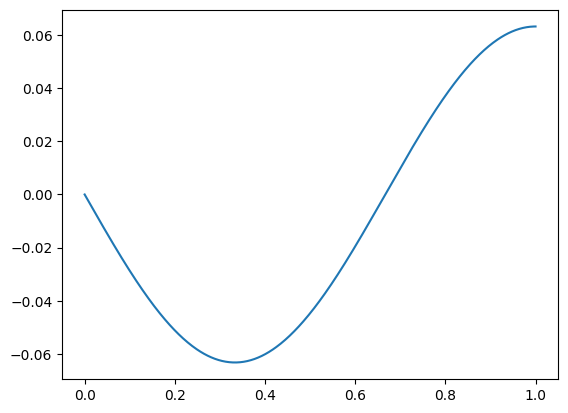

This belongs to value(-61.68375408123293+0j)


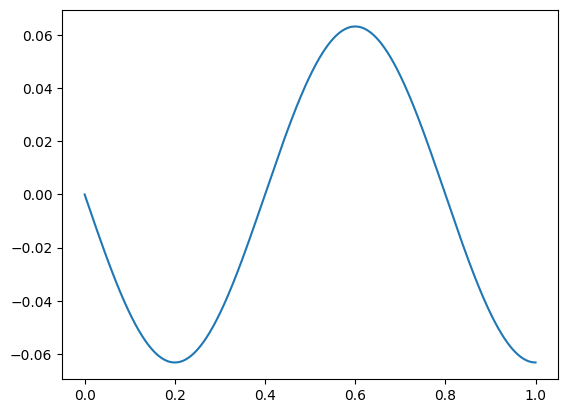

In [18]:
N = 499
Xgrid = np.linspace(0,1,N+1)
T = np.eye(N)*(-2.0) 
for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
    T[i+1,i] = 1.0
    T[i, i+1] = 1.0
T[N-1,N-2] = 2
h = (1/N)
T = T/(h**2)

eigvals, eigvectors = scipy.linalg.eig(T)
eig_dict = {eigvals[i]: np.insert(eigvectors[:,i],0,0) for i in range(len(eigvals))}

eigvals = np.sort(eigvals)[::-1]
for i in range(3):  
    plt.plot(Xgrid, (eig_dict[eigvals[i]]))
    print('This belongs to value' + str(eigvals[i]))
    plt.show()

In [74]:
def V(x):
    #return 0
    return 700*(0.5-np.abs(x-0.5))

This belongs to value(-182.76868434154594+0j)


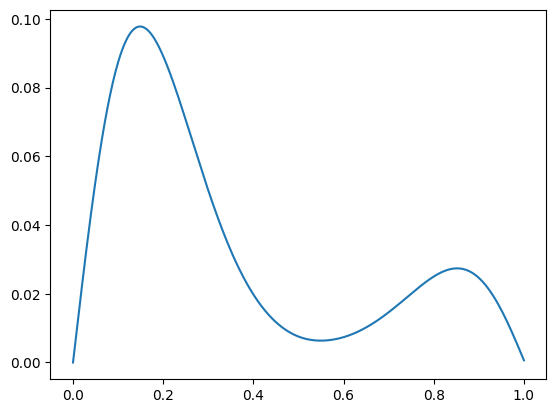

This belongs to value(-184.41779921651755+0j)


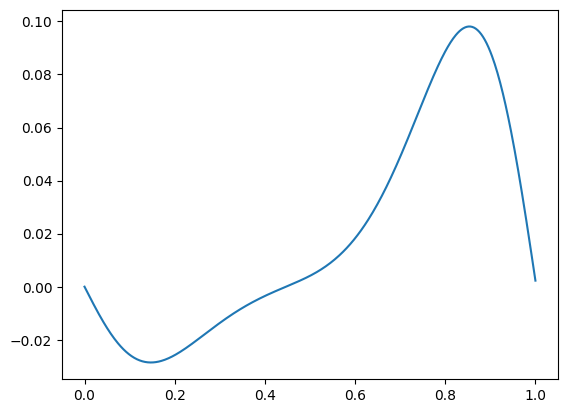

This belongs to value(-306.9822831917607+0j)


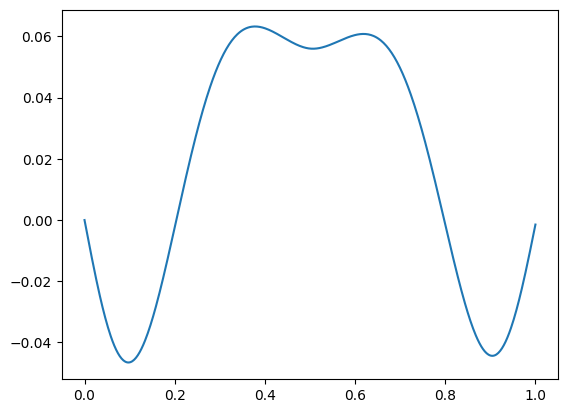

In [77]:
N = 499
Xgrid = np.linspace(0,1,N+1)
T = np.eye(N)*(-2.0) 
for i in range(N-1): #Denna for loopen  skapar T-matrisen. Kan skrivas mer effektivt. 
    T[i+1,i] = 1.0
    T[i, i+1] = 1.0

h = (1/N)
T = T/(h**2)

for i in range(N):
    T[i][i] -= V(Xgrid[i])

eigvals, eigvectors = scipy.linalg.eig(T)
eig_dict = {eigvals[i]: np.insert(eigvectors[:,i],0,0) for i in range(len(eigvals))}

eigvals = np.sort(eigvals)[::-1]
for i in range(3):  
    plt.plot(Xgrid, (eig_dict[eigvals[i]]))
    print('This belongs to value' + str(eigvals[i]))
    plt.show()